## 分群评估

In [3]:
import pandas
dataset = pandas.read_csv('data/customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
x = dataset.iloc[:,[3,4]].values

In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5,init = 'k-means++',random_state = 42)
y_kmeans = kmeans.fit_predict(x)

In [6]:
kmeans.inertia_

44448.45544793371

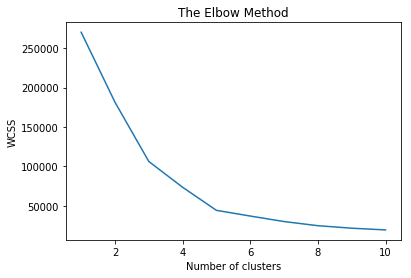

In [8]:
import matplotlib.pyplot as plt
wcss =[]
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,init =  'k-means++',random_state= 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## 评估分群效果

In [9]:
y_kmeans

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [10]:
from sklearn import metrics
print('Silhouette Coefficient: %0.3f' % metrics.silhouette_score(x,y_kmeans))

Silhouette Coefficient: 0.554


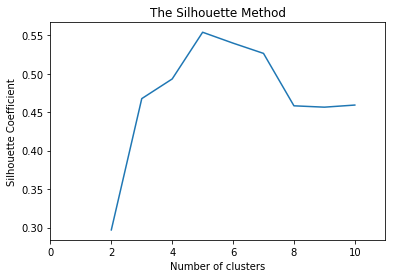

In [14]:
import matplotlib.pyplot as plt
sil =[]
for i in range(2,11):
    kmeans = KMeans(n_clusters = i,init =  'k-means++',random_state= 42)
    y_kmeans = kmeans.fit_predict(x)
    sil.append(metrics.silhouette_score(x,y_kmeans))
plt.plot(range(2,11),sil)
plt.xlim([0,11])
plt.title('The Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()

In [22]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

ward = AgglomerativeClustering(n_clusters = 5,affinity = 'euclidean',linkage = 'ward')
y_ward = ward.fit_predict(x)
complete = AgglomerativeClustering(n_clusters = 5,affinity = 'euclidean',linkage = 'complete')
y_complete = ward.fit_predict(x)
kmeans = KMeans(n_clusters = 5,init= 'k-means++',random_state = 42)
y_kmeans = kmeans.fit_predict(x)

for est,title in zip([y_ward,y_complete,y_kmeans],['ward','complete','kmeans']):
    print(title,metrics.silhouette_score(x,est))

ward 0.5529945955148897
complete 0.5529945955148897
kmeans 0.553931997444648
